## Data Cleaning and Feature Addition
***By far the most exhaustive part of this project as there were so many features to look at. This was also a very iterative process that involved constant updating post-modeling*** 
1. Explore the dataset.  Remove useless features/Columns
1. Remove useless rows (Shared room).  Check for NaN's
1. Start incorporating new features - Numerical
1. Start incorporating new features - Categorical
1. Include some engineered features
1. Incorporate the Cash Flow as a target variable


### 1. Basic info about the dataset

In [560]:
import pandas as pd
import numpy as np
import seaborn as sns
import dtale
pd.set_option('display.max_rows', 60)
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [561]:
df = pd.read_pickle('List_Cal_df.pkl')

In [684]:
df.describe() #Looks like some null values.  Also looks like most columns are the appropriate datatype

,id,host_response_rate,latitude,longitude,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,cleaning_fee,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,listing_id,days_rented,vacancy
count,2.255200e+04,9657.000000,22552.000000,22552.000000,22552.000000,22520.000000,22534.000000,22512.000000,22552.000000,3681.000000,2659.000000,15406.000000,22552.000000,22552.000000,2.255200e+04,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,22552.000000,18638.000000,18644.000000,18163.000000,18138.000000,18141.000000,18120.000000,18134.000000,18121.000000,18117.000000,18638.000000,2.255200e+04,22552.000000,22552.000000
mean,1.571560e+07,0.918985,52.509824,13.406107,2.637460,1.092695,1.161134,1.620558,67.143668,349.166802,1146.311395,26.721018,1.332121,7.157059,1.030505e+05,4.944173,11.146639,20.016096,79.852829,43411.000266,17.840679,42698.949726,43153.970071,94.413863,9.663965,9.324955,9.713521,9.730672,9.505491,9.411106,1.135525,1.571560e+07,285.147171,0.218775
std,8.552069e+06,0.193761,0.030825,0.057964,1.510548,0.329894,0.646156,1.174840,220.266210,232.915323,829.306333,30.588015,0.835034,40.665073,9.640519e+06,8.677395,17.522371,28.349136,119.368162,0.023066,36.769624,558.288201,350.248883,7.639644,0.740039,1.031996,0.704620,0.686614,0.762161,0.841492,1.507082,8.552069e+06,119.368162,0.327036
min,2.015000e+03,0.000000,52.345803,13.103557,1.000000,0.000000,0.000000,0.000000,0.000000,65.000000,265.000000,0.000000,1.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,43411.000000,0.000000,39984.000000,40437.000000,20.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,0.010000,2.015000e+03,0.000000,0.000000
25%,8.065954e+06,0.950000,52.489065,13.375411,2.000000,1.000000,1.000000,1.000000,30.000000,200.000000,693.000000,10.000000,1.000000,2.000000,2.000000e+01,0.000000,0.000000,0.000000,0.000000,43411.000000,1.000000,42362.000000,43011.000000,92.000000,10.000000,9.000000,10.000000,10.000000,9.000000,9.000000,0.180000,8.065954e+06,236.000000,0.000000
50%,1.686638e+07,1.000000,52.509079,13.416779,2.000000,1.000000,1.000000,1.000000,45.000000,300.000000,980.000000,20.000000,1.000000,2.000000,1.124000e+03,0.000000,0.000000,0.000000,4.000000,43411.000000,5.000000,42840.000000,43332.000000,97.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,0.540000,1.686638e+07,361.000000,0.010959
75%,2.258393e+07,1.000000,52.532669,13.439259,3.000000,1.000000,1.000000,2.000000,70.000000,413.000000,1350.000000,35.000000,1.000000,4.000000,1.125000e+03,6.000000,18.000000,36.000000,129.000000,43411.000000,16.000000,43156.000000,43392.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.500000,2.258393e+07,365.000000,0.353425
max,2.986735e+07,1.000000,52.651670,13.757642,16.000000,8.500000,12.000000,22.000000,9000.000000,3650.000000,13900.000000,2000.000000,16.000000,5000.000000,1.000000e+09,30.000000,60.000000,90.000000,365.000000,43413.000000,498.000000,43411.000000,43411.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,36.670000,2.986735e+07,365.000000,1.000000


### 1. Keep only necessary Columns

In [685]:
cols = df.columns


In [686]:
cols_to_drop = [
       'host_verifications', 'neighbourhood', 'neighbourhood_cleansed',
       'zipcode', 'weekly_price','zipcode',
       'monthly_price', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'calendar_last_scraped',
       'first_review', 'last_review', 'is_business_travel_ready', 'host_response_rate', 'number_of_reviews']

df1 = df.drop(cols_to_drop, axis=1)

=============================================================================================================
### 2.  Data Cleaning
1. Remove Shared Rooms
1. Study Null Values
1. Remove Property Types that are underrepresented, commercial or don't contain a standing structure
1. Remove prices that are too high(>600) 
1. Remove properties that have a minimum nightly rental above 60.  I want to look at short-term rentals mostly

### 2a. Remove Shared Room

In [566]:
df2 = df1[df1['room_type']!= 'Shared room']

### 2b. Study Null Values
- Fill in cleaning, reviews, and superhost with 0 or false
- Fill in the rest with the median values

In [687]:
#Luckily The main columns of interest have little to no null values on a whole.
nulls = df1.isna().sum().reset_index()
nulls.head(60)

,index,0
0,id,0
1,name,59
2,summary,963
3,space,8532
4,description,203
5,transit,9516
6,host_response_time,12894
7,host_is_superhost,26
8,neighbourhood_group_cleansed,0
9,city,5


In [688]:
df2['cleaning_fee'] = df2['cleaning_fee'].fillna(0)
df2['reviews_per_month'] = df2['reviews_per_month'].fillna(0)
df2['host_is_superhost'] = df2['host_is_superhost'].fillna('f')
df2['city'] = df2['city'].fillna('Berlin')
df2 = df2.fillna(df2.median())

In [689]:
df3 = df2.copy()

### 2c.  What kind of Property Types are there?
- In this case, I will not be analyzing any commercial-type properties, properties that don't involve an actual property(i.e. Camper/RV), or very low-runners

<AxesSubplot:>

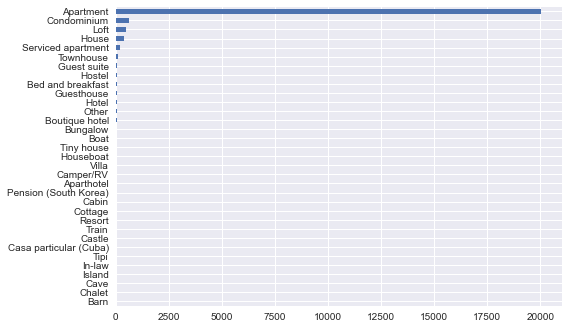

In [690]:
df3['property_type'].value_counts(ascending=True).plot(kind='barh')

In [691]:
keep_props = ['Guesthouse', 'Apartment', 'Condominium', 'Loft', 'House',
       'Townhouse','Guest suite']

In [692]:
df3 = df3[df3['property_type'].isin(keep_props)]
len(df3)

21703

### 2d. Remove prices that are above 600/night

In [694]:
df3 = df3[df3['price']<600]
len(df3)

21678

### 2e. Remove apartments where the minimum nights are above 60
- Not looking for super-long term rentals

In [695]:
df3 = df3[df3['minimum_nights']<61]
len(df3)

21232

====================================================================================================
### 3. Feature Addition! 
- **Create Distance from Center Feature**
- **Working with Amenities.** Determine which amenities are worth looking further into. Since there are so many I only want to look at 5 amenities which cannot be easily incorporated into a future home (i.e. wifi can easily be added but Free Street Parking cannot).  In addition, I want to add a feature which takes a count of total amenities per listing



### 3a. Add Distance Feature

In [696]:
dff1 = df3.copy()

In [697]:
from geopy.distance import great_circle
def distance_to_mid(lat, lon):
    berlin_centre = (52.5027778, 13.404166666666667)
    accommodation = (lat, lon)
    return great_circle(berlin_centre, accommodation).km

In [698]:
dff1['distance(km)'] = dff1.apply(lambda x: distance_to_mid(x.latitude, x.longitude), axis=1)
dff1.head(2)

,id,name,summary,space,description,transit,host_response_time,host_is_superhost,neighbourhood_group_cleansed,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,listing_id,days_rented,vacancy,distance(km)
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,"Close to U-Bahn U8 and U2 (metro), Trams M12, ...",within an hour,t,Mitte,Berlin,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",60,30.0,1,4,1125,93.0,10.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,3.76,2015,224,0.386301,3.533182
1,2695,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,Within walking distance you'll find the S-Bahn...,NaN,f,Pankow,Berlin,52.548513,13.404553,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17,0.0,1,2,40,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,1.42,2695,365,0.000000,5.085573


### 3b. Add Amenities Features
***This column was a string containing a list of amenities.***
- Extract each item in the list
- Create a count of each item among the whole dataset
- Decide on a just a few amenities that I think could have some explanatory power

In [711]:
dff2 = dff1.copy()

In [712]:
import re
import collections
amenities = dff2['amenities'].tolist()

In [713]:
#Looks like each item is a single string.  So need to split this up. 
amenities[1] 

'{Wifi,Kitchen,Elevator,Heating,Washer,Essentials,Shampoo,"Hair dryer","Laptop friendly workspace","Private living room"}'

In [714]:
amen_clean = [re.sub('[!@#${}""]', '', i).split(',') for i in amenities]
amen_clean[1]

['Wifi',
 'Kitchen',
 'Elevator',
 'Heating',
 'Washer',
 'Essentials',
 'Shampoo',
 'Hair dryer',
 'Laptop friendly workspace',
 'Private living room']

In [715]:
amen_dict = collections.defaultdict(int)
for list_amen in amen_clean: 
    for item in list_amen:
        amen_dict[item]+=1

In [716]:
amen_df = pd.DataFrame.from_dict(amen_dict, orient='index', columns=['Totals'])
amen_df=amen_df.sort_values(by='Totals', ascending=False).head(45).reset_index()

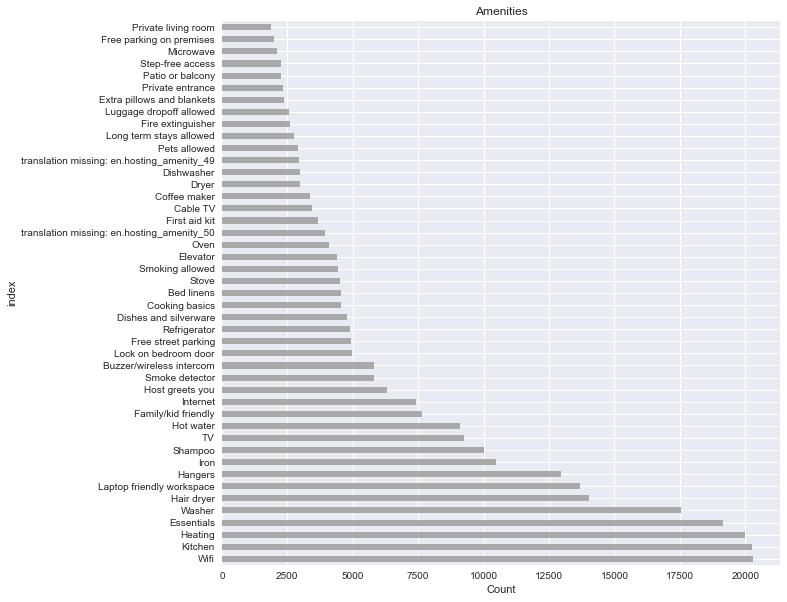

In [717]:
amen_df.plot(kind='barh', x='index', y='Totals',  figsize=(10,10), legend=False, color='darkgrey',
            title='Amenities')
plt.xlabel('Count');

In [718]:
#Below are the features that I will keep
dff2['amen_patio'] = dff2['amenities'].str.contains('Patio or balcony').astype(int)
dff2['amen_dryer'] = dff2['amenities'].str.contains('Dryer').astype(int)
dff2['amen_family_friendly'] = dff2['amenities'].str.contains('Family/kid friendly').astype(int)
dff2['amen_parking'] = dff2['amenities'].str.contains('Free street parking').astype(int)
dff2['amen_laptop'] = dff2['amenities'].str.contains('Laptop friendly workspace').astype(int)
dff2['amen_tv'] = dff2['amenities'].str.contains('TV').astype(int)

In [719]:
dff2.head(2)

,id,name,summary,space,description,transit,host_response_time,host_is_superhost,neighbourhood_group_cleansed,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,listing_id,days_rented,vacancy,distance(km),amen_patio,amen_dryer,amen_family_friendly,amen_parking,amen_laptop,amen_tv
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,"Close to U-Bahn U8 and U2 (metro), Trams M12, ...",within an hour,t,Mitte,Berlin,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",60,30.0,1,4,1125,93.0,10.0,9.0,10.0,10.0,10.0,9.0,f,strict_14_with_grace_period,3.76,2015,224,0.386301,3.533182,0,0,1,0,1,1
1,2695,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,Within walking distance you'll find the S-Bahn...,NaN,f,Pankow,Berlin,52.548513,13.404553,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17,0.0,1,2,40,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,1.42,2695,365,0.000000,5.085573,0,0,0,0,1,0


In [720]:
#Add a a column which shows the # of amenities
def count_amen(item):
    amen = re.sub('[!@#${}""]', '', item).split(',')
    return len(amen)

In [721]:
dff2['count_amenities'] = dff2['amenities'].apply(lambda x: count_amen(x))

===============================================================================================================
### 4. Start Looking at Categorical Variables
- Convert Instant Bookable and Neighborhood to categorical integer
- Convert following into Dummies: bed type, Cancellation policy, host response time

### Instant Bookable and Is Superhost

In [787]:
# Add integer to host_superhost
dff3 = dff2.copy()
dff3['host_is_superhost'].replace(('t', 'f'), (1, 0), inplace=True)

#dff2['host_is_superhost'] = dff2['host_is_superhost'].astype(int)

dff3['instant_bookable'].replace(('t', 'f'), (1, 0), inplace=True)


### Create a neighborhood label column which can later be used as a feature

In [788]:
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
dff3['neighbourhood_labels'] = labelencoder.fit_transform(dff3['neighbourhood_group_cleansed'])
 
dff3['neighbourhood_labels'].unique()

array([ 4,  6, 10,  1,  5,  0, 11,  9,  7,  2,  3,  8])

### Bed Type
- Being in the shoes of someone looking to book, The type of bed is a huge factor.  This set is quite imbalanced but will still keep as a feature

In [789]:
dff3.groupby('bed_type')['price'].count() 

bed_type
Airbed              19
Couch               66
Futon              233
Pull-out Sofa      419
Real Bed         20495
Name: price, dtype: int64

In [790]:
dff3.groupby('bed_type')['price'].mean()

bed_type
Airbed           57.315789
Couch            58.303030
Futon            40.785408
Pull-out Sofa    44.983294
Real Bed         58.155209
Name: price, dtype: float64

### Host response time
- Being in the shoes of someone looking to book, Having a host that is very responsive is a huge plus.  
- Will keep this as a feature


In [791]:
dff3['host_response_time'].value_counts()

within an hour        4679
within a few hours    1988
within a day          1902
a few days or more     348
Name: host_response_time, dtype: int64

In [792]:
dff3.groupby(['host_response_time'])['price'].mean()

host_response_time
a few days or more    58.215517
within a day          59.284963
within a few hours    63.284708
within an hour        64.814918
Name: price, dtype: float64

### Cancellation Policy
- Being in the shoes of someone looking to book, cancellation policy could be a factor so will keep it as a categorical.  Most likely as either flexible or not

In [793]:
dff3['cancellation_policy'].value_counts()

flexible                       8694
moderate                       6759
strict_14_with_grace_period    5731
super_strict_30                  45
super_strict_60                   3
Name: cancellation_policy, dtype: int64

In [794]:
dff3.groupby(['cancellation_policy'])['price'].median()

cancellation_policy
flexible                       40
moderate                       47
strict_14_with_grace_period    56
super_strict_30                42
super_strict_60                81
Name: price, dtype: int64

### Merge the categorical Columns

In [795]:
dff4 = dff3.copy()

In [796]:
cats = ['bed_type', 'host_response_time', 'cancellation_policy', 'room_type']

In [797]:
cat_feats = dff4[cats]
cat_feats = pd.get_dummies(cat_feats)
cat_feats = cat_feats.astype(int)

In [798]:
dff4 = pd.concat([dff4, cat_feats], axis=1)
dff4.head(2)

,id,name,summary,space,description,transit,host_response_time,host_is_superhost,neighbourhood_group_cleansed,city,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,price,cleaning_fee,guests_included,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,listing_id,days_rented,vacancy,distance(km),amen_patio,amen_dryer,amen_family_friendly,amen_parking,amen_laptop,amen_tv,count_amenities,neighbourhood_labels,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Entire home/apt,room_type_Private room
0,2015,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,"Close to U-Bahn U8 and U2 (metro), Trams M12, ...",within an hour,1,Mitte,Berlin,52.534537,13.402557,Guesthouse,Entire home/apt,3,1.0,1.0,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",60,30.0,1,4,1125,93.0,10.0,9.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,3.76,2015,224,0.386301,3.533182,0,0,1,0,1,1,29,4,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1,2695,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,Within walking distance you'll find the S-Bahn...,NaN,0,Pankow,Berlin,52.548513,13.404553,Apartment,Private room,2,1.0,1.0,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",17,0.0,1,2,40,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,flexible,1.42,2695,365,0.000000,5.085573,0,0,0,0,1,0,10,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


===============================================================================================
# 5. Feature Engineering
- See if I can extract an apartment size from the descriptions
- Create a feature which looks at the length of descriptions and summary

### 5a. Apartment Size
***Not Easy!!***
- Regex to extract from Description
- Impute the missing values using Linear Regression
- Merge the size dataframe with the main dataframe

In [800]:
dfe2 = dff4.copy()

In [801]:
dfe2['size'] = dfe2['description'].str.extract('(\d{2,3}\s?[smSMsquare])', expand=True)
dfe2['size'] = dfe2['size'].str.replace("\D", "")
dfe2['size'] = dfe2['size'].astype(float)
dfe2[['description', 'size']].head() #Works! kind of..

,description,size
0,Great location! 30 of 75 sq meters. This wood...,75.0
1,In the summertime we are spending most of our ...,25.0
3,First of all: I prefer short-notice bookings. ...,26.0
4,Cozy and large room in the beautiful district ...,20.0
5,4 bedroom with very large windows and outstand...,780.0


In [802]:
#There are still plenty of Nulls.  
print('Nulls:', dfe2['size'].isna().sum())

Nulls: 9731


In [803]:
#Before I do that, Just want to keep the minimum size at 10sqm
dfe2['size'] = dfe2['size'].clip(lower=10)

In [804]:
#Decide which features I'll use to predict House Size
cols = ['accommodates', 'bathrooms', 'bedrooms',  'price', 'cleaning_fee', 
                 'guests_included', 'distance(km)', 'size']
sub_df = dfe2[cols]

# split datasets
train_data = sub_df[sub_df['size'].notnull()]
test_data  = sub_df[sub_df['size'].isnull()]

# define X
X_train = train_data.drop('size', axis=1)
X_test  = test_data.drop('size', axis=1)

# define y
y_train = train_data['size']
print("Shape of Training Data:", train_data.shape)
print("Shape of Test Data:    ",test_data.shape)
print("\nShape of y_train:", y_train.shape)

Shape of Training Data: (11501, 8)
Shape of Test Data:     (9731, 8)

Shape of y_train: (11501,)


In [808]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_test = linreg.predict(X_test)
y_test = pd.DataFrame(y_test)
y_test.columns = ['size']
print(y_test.shape)
y_test.head()

(9731, 1)


,size
0,71.007923
1,84.538574
2,50.251408
3,67.188074
4,48.165420


In [809]:
prelim_index = pd.DataFrame(X_test.index)
prelim_index.columns = ['prelim']

# ... and concat this dataframe with y_test
y_test = pd.concat([y_test, prelim_index], axis=1)
y_test.set_index(['prelim'], inplace=True)
y_test.head()

new_test_data = pd.concat([X_test, y_test], axis=1)
new_test_data.shape

(9731, 8)

In [810]:
# combine train and test data back to a new sub df
sub_df_new = pd.concat([new_test_data, train_data], axis=0)

print(sub_df_new.shape)
sub_df_new.head()

(21232, 8)


,accommodates,bathrooms,bedrooms,price,cleaning_fee,guests_included,distance(km),size
12,4,1.0,1.0,70,40.0,2,2.061292,71.007923
13,4,1.0,2.0,98,50.0,2,1.868255,84.538574
24,1,1.0,1.0,44,15.0,1,4.650043,50.251408
32,2,1.0,1.0,80,35.0,2,2.296091,67.188074
35,2,1.0,1.0,40,0.0,1,3.325620,48.165420


In [811]:
dfe2.drop(['accommodates', 'bathrooms', 'bedrooms', 'price', 'cleaning_fee', 
             'guests_included', 'distance(km)', 'size'], 
            axis=1, inplace=True)
# concate back to complete dataframe
dfe3 = pd.concat([sub_df_new, dfe2], axis=1)

print(dfe3.shape)
dfe3.head(2)

(21232, 64)


,accommodates,bathrooms,bedrooms,price,cleaning_fee,guests_included,distance(km),size,id,name,summary,space,description,transit,host_response_time,host_is_superhost,neighbourhood_group_cleansed,city,latitude,longitude,property_type,room_type,beds,bed_type,amenities,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,listing_id,days_rented,vacancy,amen_patio,amen_dryer,amen_family_friendly,amen_parking,amen_laptop,amen_tv,count_amenities,neighbourhood_labels,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Entire home/apt,room_type_Private room
0,3,1.0,1.0,60,30.0,1,3.533182,75.0,2015,Berlin-Mitte Value! Quiet courtyard/very central,Great location! 30 of 75 sq meters. This wood...,A+++ location! This „Einliegerwohnung“ is an e...,Great location! 30 of 75 sq meters. This wood...,"Close to U-Bahn U8 and U2 (metro), Trams M12, ...",within an hour,1,Mitte,Berlin,52.534537,13.402557,Guesthouse,Entire home/apt,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,Gym,Heating,""Famil...",4,1125,93.0,10.0,9.0,10.0,10.0,10.0,9.0,0,strict_14_with_grace_period,3.76,2015,224,0.386301,0,0,1,0,1,1,29,4,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1,2,1.0,1.0,17,0.0,1,5.085573,25.0,2695,Prenzlauer Berg close to Mauerpark,NaN,In the summertime we are spending most of our ...,In the summertime we are spending most of our ...,Within walking distance you'll find the S-Bahn...,NaN,0,Pankow,Berlin,52.548513,13.404553,Apartment,Private room,1.0,Real Bed,"{Wifi,Kitchen,Elevator,Heating,Washer,Essentia...",2,40,100.0,10.0,10.0,10.0,10.0,10.0,10.0,0,flexible,1.42,2695,365,0.000000,0,0,0,0,1,0,10,6,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1


In [812]:
#For every neighborhood, there seems to be an issue with sizes above 400 and ones that =0, so will remove rows above that
dfe4= dfe3.copy()
dfe4.drop(dfe4[ (dfe4['size'] == 0.) | (dfe4['size'] > 299) ].index, axis=0, inplace=True)

### 5b. Descriptive Lengths
- Here I wanted to see if the length of the descriptions and the space have any bearing on Cash Flow

In [746]:
dfe4['len_desc'] = dfe4['description'].str.len()
dfe4['len_space'] = dfe4['space'].str.len()
dfe4['len_desc'].fillna(0, inplace=True)
dfe4['len_space'].fillna(0, inplace=True)

===============================================================================================================
# 6. Build Target Variable
- days_rented: Cap the maximum at 340 and remove rows below 30 days as they do not represent active Airbnb renters
- Use the Median monthly Cash Flow for a given neighborhood/room_type as the primary Target Variable

In [768]:
dft1= dfe4.copy()


In [769]:
#Keeping the range of days rented from 30 to 340
dft1['days_rented'] = dft1['days_rented'].clip(upper=340)
dft1 = dft1[dft1['days_rented']>30]


In [770]:
dft1['monthly_cash_flow'] = dft1['price']*dft1['days_rented']/12

cash_by_area = dft1.groupby(['neighbourhood_group_cleansed', 'room_type'])['monthly_cash_flow'].median().reset_index()
cash_by_area = cash_by_area.rename(columns={'monthly_cash_flow': 'median_cash_flow'})

dft1 = dft1.merge(cash_by_area, left_on=['neighbourhood_group_cleansed', 'room_type'], 
                right_on=['neighbourhood_group_cleansed', 'room_type'])

dft1['target'] = dft1['median_cash_flow']<dft1['monthly_cash_flow']
dft1['target'] = dft1['target'].astype(int)

In [771]:
# Looks Good!!
dft1[dft1['neighbourhood_group_cleansed']=='Pankow'].sample(5)

,accommodates,bathrooms,bedrooms,price,cleaning_fee,guests_included,distance(km),size,id,name,summary,space,description,transit,host_response_time,host_is_superhost,neighbourhood_group_cleansed,city,latitude,longitude,property_type,room_type,beds,bed_type,amenities,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,reviews_per_month,listing_id,days_rented,vacancy,amen_patio,amen_dryer,amen_family_friendly,amen_parking,amen_laptop,amen_tv,count_amenities,bed_type_Airbed,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,host_response_time_a few days or more,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,room_type_Entire home/apt,room_type_Private room,neighbourhood_labels,len_desc,len_space,monthly_cash_flow,median_cash_flow,target
8358,2,1.0,1.0,80,40.0,1,4.874621,67.029617,14871410,1 Zimmerwohnung über Weihnachten und Sylvester,"Die Einzimmerwohnung ist im Prenzlauer Berg, i...",NaN,"Die Einzimmerwohnung ist im Prenzlauer Berg, i...",NaN,within a day,0,Pankow,Berlin,52.546543,13.408334,Condominium,Entire home/apt,1.0,Real Bed,"{Wifi,Kitchen,""Buzzer/wireless intercom"",Heati...",4,14,100.0,10.0,10.0,10.0,10.0,8.0,10.0,0,strict_14_with_grace_period,0.10,14871410,141,0.613699,0,0,0,0,1,0,13,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,6,219.0,0.0,940.000000,1627.750,0
8792,4,1.0,2.0,120,0.0,3,3.342552,78.095790,21835452,"Large rooftop studio with terrace, fireplace, ...",Large studio apartment with great view over Be...,NaN,Large studio apartment with great view over Be...,NaN,NaN,1,Pankow,Berlin,52.531908,13.416360,Apartment,Entire home/apt,2.0,Real Bed,"{TV,""Cable TV"",Wifi,Kitchen,""Paid parking off ...",4,50,98.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict_14_with_grace_period,2.30,21835452,90,0.753425,1,0,1,0,1,1,40,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,6,428.0,0.0,900.000000,1627.750,0
2119,2,1.0,1.0,29,15.0,2,5.001020,10.000000,6990044,Delightful sunny room with balcony,Hello Berlin lovers! Spacious and sunny room ...,NaN,Hello Berlin lovers! Spacious and sunny room ...,3 min walk from the S-bahn station Prenzlauer ...,NaN,0,Pankow,Berlin,52.546106,13.423987,Apartment,Private room,1.0,Real Bed,"{Internet,Wifi,Kitchen,""Smoking allowed"",""Buzz...",2,1125,92.0,10.0,8.0,10.0,10.0,10.0,10.0,0,flexible,0.13,6990044,340,0.000000,0,0,1,0,0,0,10,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,6,457.0,0.0,821.666667,878.125,0
2368,2,1.0,1.0,40,10.0,1,5.848600,50.389184,13457517,Sunny and cosy room in Prenzlauer Berg,"Hey dear guests, the apartment with your room ...",NaN,"Hey dear guests, the apartment with your room ...",NaN,NaN,0,Pankow,Berlin,52.555020,13.414201,Condominium,Private room,1.0,Real Bed,"{Wifi,Kitchen,Heating,Washer,Essentials,Shampo...",2,1125,95.0,10.0,10.0,10.0,10.0,10.0,10.0,0,flexible,0.14,13457517,340,0.000000,0,0,0,0,0,0,11,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,6,117.0,0.0,1133.333333,878.125,1
7483,3,1.0,2.0,60,60.0,1,5.205733,75.000000,281152,beautiful 3-room-apartment (75 m2),NaN,Beautiful 3-room-apartment in Berlin-Prenzlaue...,Beautiful 3-room-apartment in Berlin-Prenzlaue...,S-/U-Bahn & Tram Schönhauser Allee sind 3 Minu...,NaN,0,Pankow,Berlin,52.548988,13.416506,Apartment,Entire home/apt,2.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,Kitchen,""Buzzer/w...",14,28,97.0,10.0,10.0,10.0,10.0,10.0,10.0,0,strict_14_with_grace_period,0.00,281152,340,0.000000,0,1,1,0,0,1,10,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,6,748.0,748.0,1700.000000,1627.750,1


In [778]:
cols_to_drop_final = ['transit', 'latitude',
       'longitude', 'property_type', 'minimum_nights', 'maximum_nights', 'listing_id', 
       'vacancy', 
       'bed_type_Airbed', 
       'host_response_time_a few days or more',
       'host_response_time_within a day',
       'cancellation_policy_moderate',
       'cancellation_policy_strict_14_with_grace_period',
       'cancellation_policy_super_strict_30',
       'cancellation_policy_super_strict_60', 
       'room_type_Private room']

In [779]:

df_clean_analysis = dft1.drop(columns=(cols_to_drop_final), axis=1)

In [780]:
dft1.to_pickle('cleaned_full_dataframe.pkl')

In [781]:
df_clean_analysis.to_pickle('cleaned_analysis_dataframe.pkl')